In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#import data set
df_2019 = pd.read_csv('2018-2019NBA_player_stats.csv')
df_2020 = pd.read_csv('2019-2020NBA_player_stats.csv')
df_2021 = pd.read_csv('2020-2021NBA_player_stats.csv')

In [3]:
#rename columns of each dataframe
seasons = [df_2019, df_2020, df_2021]
for i in seasons:
    i.drop('RANK', axis = 1, inplace = True)
    i.rename(columns= {
        'FULL NAME' : 'NAME', 
        'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor' : 'MIN%',
        'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor' : 'USG%',
        'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions' : 'TO%',
        'eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA' : 'eFG%',
        'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.' : 'TS%',
        'PPGPointsPoints per game.' : 'PPG',
        'RPGReboundsRebounds per game.' : 'RPG',
        'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.' : 'TRB%',
        'APGAssistsAssists per game.' : 'APG',
        'AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court' : 'AST%',
        'SPGStealsSteals per game.' : 'SPG',
        'BPGBlocksBlocks per game.' : 'BPG',
        'TOPGTurnoversTurnovers per game.' : 'TOPG',
        'VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10' : 'VI',
        'ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.' : 'ORTG',
        'DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.' : 'DRTG'
    }, inplace = True)

In [4]:
#add column for season since we are going to add all 3 dfs together
df_2019['Season'] = '2018-2019'
df_2020['Season'] = '2019-2020'
df_2021['Season'] = '2020-2021'

In [5]:
#merge dataframe into 1 big dataframe and reset indexes
df = pd.concat(seasons)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [6]:
#drop all columns with a null value and any column with less than 10 games played then reset indices

#drop columns with less than 10 games
df = df.drop(df[df.GP < 10].index) 

#drop columns with null values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN_indices = list(rows_with_NaN.index)
df.drop(rows_with_NaN_indices, inplace = True)

#reset indices
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [7]:
#add a column for fantasy points
df['AvgFanPt'] = (df['PPG'] + df['RPG'] * 1.2 + df['APG'] * 1.5 + 
                  df['SPG'] * 3 + df['BPG'] * 3 - df['TOPG'])

In [8]:
df.columns

Index(['NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'TRB%',
       'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG', 'Season',
       'AvgFanPt'],
      dtype='object')

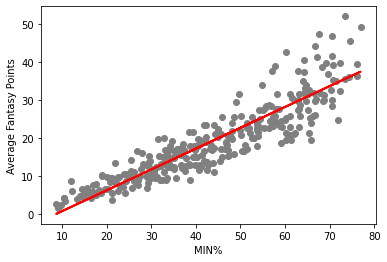

The r squared value is  0.8101764530482566
The mean absolute error is  3.2704886509905413
The mean squared error is  18.82601744775346
The root mean squared error is  4.3388958788790335


In [9]:
#linear regression

#obtain x and y values from dataframe and reshape them into arrays that can be passed in
x = df['MIN%'].values.reshape(-1,1)
y = df['AvgFanPt'].values.reshape(-1,1)


#train regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training algorithm
y_pred = regressor.predict(x_test)

#plot predicted and actual data
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('MIN%')
plt.ylabel('Average Fantasy Points')
plt.show()

#calculate r^2, mean absolute error, mean squarred error, and root mean squared error
print('The r squared value is ', r2_score(y_test, y_pred))
print('The mean absolute error is ', mean_absolute_error(y_test, y_pred))
print('The mean squared error is ', mean_squared_error(y_test, y_pred))
print('The root mean squared error is ', (mean_squared_error(y_test, y_pred))**0.5)

In [10]:
#multivariate regression

#obtain x and y values from dataframe and reshape them into arrays that can be passed in
x1 = df['MIN%'].values.reshape(-1,1)
x2 = df['eFG%'].values.reshape(-1,1)
x3 = df['VI'].values.reshape(-1,1)
x = np.concatenate((x1,x2,x3), axis = 1)
y = df['AvgFanPt'].values.reshape(-1,1)

#train regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training algorithm
y_pred = regressor.predict(x_test)

#calculate r^2, mean absolute error, mean squarred error, and root mean squared error
print('The r squared value is ', r2_score(y_test, y_pred))
print('The mean absolute error is ', mean_absolute_error(y_test, y_pred))
print('The mean squared error is ', mean_squared_error(y_test, y_pred))
print('The root mean squared error is ', (mean_squared_error(y_test, y_pred))**0.5)

The r squared value is  0.9317400574086718
The mean absolute error is  2.1363816986959683
The mean squared error is  8.25646252384804
The root mean squared error is  2.873406084048692


In [61]:
(df.sort_values(by = ['AvgFanPt'], ascending = False)).head(10)

,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,...,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Season,AvgFanPt
213,James Harden,Hou,G,29.63,78,36.8,76.6,40.5,14.5,858,...,7.5,39.5,2.05,0.73,4.96,13.2,118.6,103.5,2018-2019,58.65
732,James Harden,Hou,G,30.97,68,36.5,76.1,36.2,14.0,800,...,7.5,35.9,1.84,0.88,4.49,13.0,120.3,103.3,2019-2020,57.02
696,Giannis Antetokounmpo,Mil,F,25.69,63,30.4,63.4,37.5,13.2,629,...,5.6,34.2,0.98,1.05,3.65,17.2,116.1,90.2,2019-2020,56.66
172,Giannis Antetokounmpo,Mil,F,24.35,72,32.8,68.2,32.3,14.7,686,...,5.9,30.3,1.26,1.53,3.71,15.5,121.6,93.9,2018-2019,56.21
25,Anthony Davis,Nor,F-C,26.09,56,33.0,68.8,29.5,8.5,433,...,3.9,19.0,1.57,2.41,2.02,12.9,122.1,104.5,2018-2019,56.07
431,Russell Westbrook,Okc,G,30.41,73,36.0,75.0,30.9,16.2,450,...,10.7,46.5,1.95,0.45,4.44,15.5,105.2,97.2,2018-2019,55.03
1410,Nikola Jokic,Den,C,26.24,72,34.6,72.0,29.6,13.1,394,...,8.3,40.4,1.32,0.67,3.08,15.4,129.8,104.8,2020-2021,54.70
1201,Giannis Antetokounmpo,Mil,F,26.44,61,33.0,68.7,32.5,13.2,581,...,5.9,28.7,1.18,1.21,3.39,14.8,121.1,102.2,2020-2021,53.93
1462,Russell Westbrook,Was,G,32.51,65,36.4,75.9,30.3,18.0,413,...,11.7,48.6,1.35,0.35,4.80,15.8,104.1,104.3,2020-2021,53.85
246,Joel Embiid,Phi,F-C,25.07,64,33.7,70.1,33.3,13.3,649,...,3.7,18.4,0.72,1.91,3.55,13.2,113.7,98.7,2018-2019,53.71
